<a href="https://colab.research.google.com/github/Suresh-katari-NRIDegree/ML/blob/main/ML_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random

In [5]:
# introduction to ml
# used library - random , numpy, pandas,


In [4]:
# terms in ML

# 1 collection : data used for traing validating and testing the machine
# 2 feature (x) : independent varible or imput varible used to pradect the taget varible
# 3 target (y) : Depentent varible - output - we want to predict - example : predicting thr number of bed rooms
# 4 traing data : subset of data set useed to tain the model
# 5 texting data : sub set of data set used to validate the trained model
# 6 model : mathematical represetation of relationship between feature and a target
# 7 supervised learining (sl) : taining the data based on labeled data/the mode learnd from know / labeled data - example :
# 8 regrssion : method to predict contious values from a model and - supervised learning
# 9 overfitting : when a model learns from training data two well,includes noise - perfrom poorly new data
# 10 unnderfitting : model is too simple and does not capture patterm in data

# # categories in machine learning

# 1supervised learning
#  model learns from labeled data - 1/n paris
#  example : linear regression ,decision trees , random forster,svm
#  best use case far : house price prediction based on previous data

# 2 unsupervise learining :
#   model finds new pattern in unlabeled data without predefined data/labeled
#   example : clustering (k means),PCA ,
#   use case : customer segmentation in marketing

# 3 reinforcement learning :
#   model learn by interscting with env and receliving the rewards or penalities
#   example : deep learning,AlphaGo....
#  best use case : self car learning or driving vehicle,self learning Ai bots,SLAM
#


In [ ]:
# Example : predicting the house price - random dataset - genereted
# Steps :
# 1 genereting a random dataset
# 2 train a ml model - linear regression
# 3 evaluate the model
# 4 make prediction


In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [11]:
# step 1 : generete a random dataset
np.random.seed(42) # use to set sequence of values for the random package
numsamples = 100

size = np.random.randint(500,5000,numsamples) # create num samples number of dample from
bedrooms = np.random.randint(1,6,numsamples)
washrooms = np.random.randint(1,8,numsamples)
localityScore = np.random.randint(1,10,numsamples)

# generete house prices with randomness
houseprice = (size * 3000) + (bedrooms * 5000) + (washrooms * 30000) + (localityScore*70000) + np.random.randint(-50000,50000,numsamples)

# create a dataframe
df = pd.DataFrame(
    {
    'size' : size,
    'bedrooms' : bedrooms,
    'washrooms' : washrooms,
    'localityScore' : localityScore,
    'houseprice' : houseprice
   }
)

In [12]:
df

,size,bedrooms,washrooms,localityScore,houseprice
0,1360,2,1,5,4471293
1,4272,2,7,6,13501981
2,3592,4,2,3,11094781
3,966,5,1,9,3593403
4,4926,3,3,5,15212124
...,...,...,...,...,...
95,1528,3,4,5,5107726
96,1002,3,3,6,3488357
97,4993,4,1,9,15641479
98,1370,4,1,5,4521476


In [14]:
# step 2 : train a ML model - linear regression

# package (installation ) requirements
# pip install scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
x = df[['size','bedrooms','washrooms','localityScore']]
y = df['houseprice']

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
# step 3 :Evaluate th emodel
# package requirement :
# sklearn.metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
y_pred = model.predict(x_test)

MEN = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)# mean square error

print(f'Mean Absolute Error : {MEN}')
print(f'Mean Squared Error : {MSE}')
print(f'Root Mean Squared Error : {RMSE}')

Mean Absolute Error : 25243.12279395277
Mean Squared Error : 942600984.093867
Root Mean Squared Error : 30701.807505322337


In [30]:
# step 4 :make a prediction
newhouse = np.array([[500,1,1,1]])
predictedprice = model.predict(newhouse)
predictedprice[0]
print(f'Predicted House Price : {predictedprice[0]}')

Predicted House Price : 1624587.7555897199


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [31]:
predictedprice[0]

1624587.7555897199

In [29]:
print(f'The predicted price of new house is {predictedprice[0]}')

The predicted price of new house is 31026247.279868096


<ipython-input-45-d530cf418094>:4: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


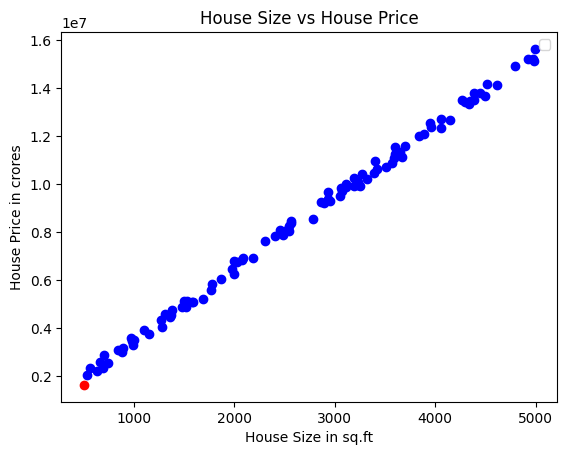

In [45]:
  plt.scatter(df['size'],df['houseprice'], color = 'blue')
  plt.xlabel('House Size in sq.ft')
  plt.ylabel('House Price in crores')
  plt.legend()
  plt.title('House Size vs House Price')
  plt.scatter(newhouse[0][0],predictedprice[0],color='red')
  plt.show()

In [43]:
xsorted = np.sort(x, axis=0)
ypred = model.predict(xsorted)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<ipython-input-48-048640e94e50>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


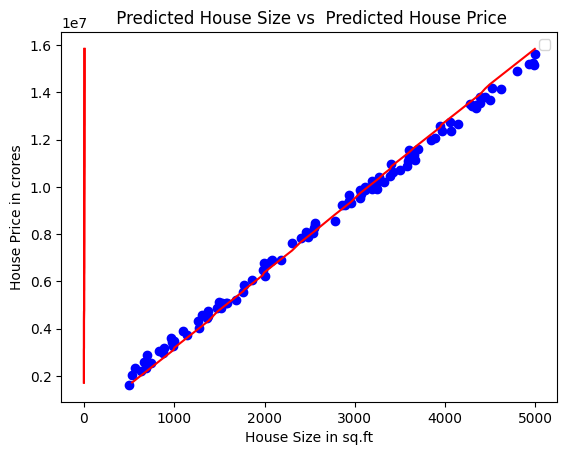

In [48]:
plt.scatter(df['size'],df['houseprice'], color = 'blue')
plt.plot(xsorted,ypred,color='red')
plt.xlabel('House Size in sq.ft')
plt.ylabel('House Price in crores')
plt.legend()
plt.title(' P redicted House Size vs  Predicted House Price')
plt.scatter(newhouse[0][0],predictedprice[0],color='blue')
plt.show()